## Basics NLP processing with spaCy and NLTK

In [2]:
# Import spaCy and load the language library
import spacy
# loading of a pre-trained model 'en_core_web_sm' available on the internet
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million.')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj
. PUNCT punct


In [3]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7fc0374413d0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7fc037646e50>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fc037646ad0>)]

This figure shows how works the spacy pipeline with each different steps.

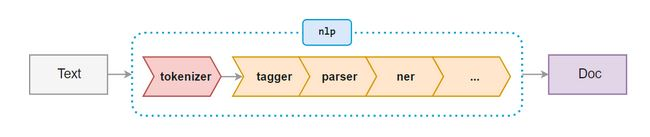

## Tokenization

In [4]:
for token in doc:
  print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million
.


In [5]:
for token in doc:
  print(token.text,"|", token.pos_, "|", spacy.explain(token.pos_))

Tesla | PROPN | proper noun
is | AUX | auxiliary
looking | VERB | verb
at | ADP | adposition
buying | VERB | verb
U.S. | PROPN | proper noun
startup | NOUN | noun
for | ADP | adposition
$ | SYM | symbol
6 | NUM | numeral
million | NUM | numeral
. | PUNCT | punctuation


In [6]:
for token in doc:
  print(token.text,"|", token.pos_,"|", spacy.explain(token.pos_), "|", token.dep_)

Tesla | PROPN | proper noun | nsubj
is | AUX | auxiliary | aux
looking | VERB | verb | ROOT
at | ADP | adposition | prep
buying | VERB | verb | pcomp
U.S. | PROPN | proper noun | compound
startup | NOUN | noun | dobj
for | ADP | adposition | prep
$ | SYM | symbol | quantmod
6 | NUM | numeral | compound
million | NUM | numeral | pobj
. | PUNCT | punctuation | punct


Entity processing

In [7]:
for entity in doc.ents:
  print(entity.text)

Tesla
U.S.
$6 million


In [8]:
for entity in doc.ents:
  print(entity.text, "|", entity.label_,"|", spacy.explain(entity.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
U.S. | GPE | Countries, cities, states
$6 million | MONEY | Monetary values, including unit


In [9]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [10]:
displacy.render(doc, style='dep', jupyter=True, options={'distance':100})

Sentences processing

In [11]:
doc_sentences = nlp(u'A thing of beauty is a joy forever. Its loveliness increases. It will never pass into nothingness.')
for sentence in doc_sentences.sents:
  print(sentence)


A thing of beauty is a joy forever.
Its loveliness increases.
It will never pass into nothingness.


In [12]:
for sentence in doc.sents:
  print(sentence)

Tesla is looking at buying U.S. startup for $6 million.


Name chunks

In [13]:
for chunk in doc.noun_chunks:
  print(chunk)

Tesla
U.S. startup


## Lemmatization

In [14]:
for token in doc:
  print(token.text,"->",token.lemma_)

Tesla -> Tesla
is -> be
looking -> look
at -> at
buying -> buy
U.S. -> U.S.
startup -> startup
for -> for
$ -> $
6 -> 6
million -> million
. -> .


In [15]:
for token in doc_sentences:
  print(token.text,"|", token.pos_,"|",token.lemma_)

A | DET | a
thing | NOUN | thing
of | ADP | of
beauty | NOUN | beauty
is | AUX | be
a | DET | a
joy | NOUN | joy
forever | ADV | forever
. | PUNCT | .
Its | DET | -PRON-
loveliness | NOUN | loveliness
increases | VERB | increase
. | PUNCT | .
It | PRON | -PRON-
will | VERB | will
never | ADV | never
pass | VERB | pass
into | ADP | into
nothingness | NOUN | nothingness
. | PUNCT | .


## Stemming

No Stemming procedure is implemented in spaCy so the use of NLTK is needed

Porter Stemming

In [16]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [17]:
p_stemmer = PorterStemmer()

In [18]:
for token in doc:
  print(token.text,"->",p_stemmer.stem(token.text))

Tesla -> tesla
is -> is
looking -> look
at -> at
buying -> buy
U.S. -> u.s.
startup -> startup
for -> for
$ -> $
6 -> 6
million -> million
. -> .


In [19]:
words = ['compute', 'computer', 'computed', 'computing','run','runner','running','ran','runs','easily','fairly', 'consolingly']

In [20]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

compute --> comput
computer --> comput
computed --> comput
computing --> comput
run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli
consolingly --> consolingli


Snowball Stemming

In [21]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

In [22]:
for token in doc:
  print(token.text,"->",s_stemmer.stem(token.text))

Tesla -> tesla
is -> is
looking -> look
at -> at
buying -> buy
U.S. -> u.s.
startup -> startup
for -> for
$ -> $
6 -> 6
million -> million
. -> .


In [23]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

compute --> comput
computer --> comput
computed --> comput
computing --> comput
run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair
consolingly --> consol


In [24]:
print('word --> (p_stemmer,s_stemmer)')
print('---------------------------')
for word in words:
    print(word+' --> ('+p_stemmer.stem(word)+','+s_stemmer.stem(word)+')')

word --> (p_stemmer,s_stemmer)
---------------------------
compute --> (comput,comput)
computer --> (comput,comput)
computed --> (comput,comput)
computing --> (comput,comput)
run --> (run,run)
runner --> (runner,runner)
running --> (run,run)
ran --> (ran,ran)
runs --> (run,run)
easily --> (easili,easili)
fairly --> (fairli,fair)
consolingly --> (consolingli,consol)


## Stop Words

In [25]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'four', 'thereupon', 'keep', '’re', 'former', 'whose', "'ve", 'neither', '‘re', 'formerly', 'same', 'throughout', 'besides', 'out', "n't", 'twenty', 'thus', '’d', 'along', 'seems', 'full', 'whom', 'elsewhere', 'hundred', 'always', 'unless', 'yourselves', 'afterwards', 'per', 'serious', 'whereupon', 'whether', 'became', '‘m', 'therein', 'seeming', "'ll", 'yours', 'meanwhile', 'or', 'him', 'perhaps', 'sixty', 'back', 'moreover', '‘d', 'itself', 'such', 'than', 'done', 'ourselves', 'whence', 'ten', 'fifty', 'least', 'too', 'becoming', 'none', 'namely', 'then', 'some', "'d", 'no', 'are', 'although', 'nine', 'now', 'her', 'beforehand', 'until', 'up', 'many', 'their', 'when', 'call', 'often', 'thereafter', 'where', 'indeed', 'which', 'them', 'front', 'thru', 'amount', 'upon', 'first', 'six', 'everywhere', 'much', 'your', "'m", 'a', 'put', 'being', 'used', 'name', 'there', 'onto', 'everything', 'themselves', 'with', 'toward', 'only', 'n’t', 'each', 'am', 'various', 'more', 'they', 'were', 'r

In [26]:
len(nlp.Defaults.stop_words)

326

Stop words checking

In [27]:
nlp.vocab['is'].is_stop

True

In [28]:
nlp.vocab['flower'].is_stop

False

Stop word addition

In [29]:
nlp.vocab['btw'].is_stop

False

In [30]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

In [31]:
'btw' in nlp.Defaults.stop_words

True

In [32]:
len(nlp.Defaults.stop_words)

327

In [33]:
nlp.vocab['btw'].is_stop

True

Stop word removal

In [34]:
nlp.vocab['beyond'].is_stop

True

In [35]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

In [36]:
len(nlp.Defaults.stop_words)

326

In [37]:
'beyond' in nlp.Defaults.stop_words

False

In [38]:
nlp.vocab['beyond'].is_stop

False

References:

https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/

https://www.udemy.com/course/nlp-natural-language-processing-with-python